# MANAGE PACKAGES

In [9]:
import sys
!{sys.executable} -m pip install  pandas sklearn matplotlib numpy seaborn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score 
from datetime import datetime
from dateutil.parser import parse
from pandas import Series, DataFrame, Panel
%matplotlib inline

# GENERAL FUNCTIONS

These functions should eventually be stored in a different file to clear up this Notebook.

Following function loads the data from the folders stored in the same directory. In final version this should be done through and URL using WebDav protocol. This is an issue to be fixed.

Functions created to read each file in each folder, format data and creat a DataFrame. This is necessary given that the data is generated in a proprietary format (SWF extention). Although it can be loaded as a CSV format and fields are recognized by Python, we need to do some changes to make easier the management of the data

In [10]:
#Formats data into float for data analysis
def convert_to_float(x):
    if isinstance(x,str):
        return float(x.replace(',','.'))
    else:
        return x                    

#Loads every line from the file into a dataframe
def load_swd(filename):
    df = pd.read_csv(filename, delimiter='\t')
    station = df.columns[0]
    df2 = pd.read_csv(filename, delimiter='\t', skiprows=[0]) 
    df2 = df2[2:]
    format_df(df2, station)
    return df2

#Renames every column with and easier name and calls function to Format data. 
#It also adds a column with the station number
def format_df(df, station):
    df.columns=['TIME','TMPA','TMPB','SMSC','SMSD','TMP','HMD','DEW']
    #Convert Variables into float
    df["TMPA"] = [convert_to_float(s) for s in df.TMPA]
    df["TMPB"] = [convert_to_float(s) for s in df.TMPB]
    df["SMSC"] = [convert_to_float(s) for s in df.SMSC]
    df["SMSD"] = [convert_to_float(s) for s in df.SMSD]
    df["TMP"] = [convert_to_float(s) for s in df.TMP] 
    df["HMD"] = [convert_to_float(s) for s in df.HMD]
    df["DEW"] = [convert_to_float(s) for s in df.DEW]
    #Convert time string into time format
    df["TIME"] = pd.to_datetime(df['TIME'])
    df["STATION"] = station

#Reads every file within the directory and calls function to insert the lines in a dataframe
def load_directory(directory_no):
    directory = str(directory_no)
    merged = []
    files = [f for f in os.listdir(directory)]
    for f in files:
        #print os.path.join(directory,f)
        filename, ext = os.path.splitext(f)
        if filename == 'INDEX':
            pass
        else:
            if ext == '.TXT':     
               # print os.path.join(directory,f)
                read = load_swd(os.path.join(directory,f)) 
                merged.append(read)
    result = pd.concat(merged)
    return result

#Given a maximum number of stations, Ex: 32. It read every station folder and returns a dataframe containing all the data
def load_all_stations(maxn):
    # return pd.concat(map(load_directory, range(1, maxn)))
    folders = range(1,maxn)
    dfstion = []
    for x in folders:
        read = load_directory(x)
        dfstion.append(read)
    completedf = pd.concat(dfstion)
    return completedf

# LOADING DATA

## Loading one single File

This is to show how the file is loaded directly with PANDAS, without any Data treatement. 

You will note that:
- This give us the original headers that are hard to refer when coding
- Data is not really in float format. It's a string that should be converted into float and formatted correctly so we can do analysis with this data. 
- Data starts in line number 2. This is corrected with upper functions

In [11]:
df = pd.read_csv('Station1_2017.TXT', delimiter='\t', skiprows=[0]) 
#df = df[1:]
df.head()

,,Temperature (*C),Temperature (*C).1,Soil Moist (kPa),Soil Moist (kPa).1,Temperature (*C).2,RH (%),Dew Point (*C)
0,,*C,*C,kPa,kPa,*C,%,*C
1,Date and Time,TMPA,TMPB,SMSC,SMSD,TMP,HMD,DEW
2,2017-05-10 10:00,"4,4","5,8",0,0,"10,9","49,3","0,7"
3,2017-05-10 10:15,"4,5",5,0,0,"10,2","48,5","-0,2"
4,2017-05-10 10:30,"4,5","4,8",0,0,"9,7","48,1","-0,8"


## Loading all the files in the Directory

In contrast with the method used above, followin Data load uses the "General Functions" in the top of this Notebook. 
You will note that: 
- Columns have been renamed for ease to use
- Data has been corectly formatted
- Data doesn't include unnecessary rows 

In [16]:
df4 = load_swd('Station10_2017.txt')

In [5]:
df4.head(20)

,TIME,TMPA,TMPB,SMSC,SMSD,TMP,HMD,DEW,STATION
2,2017-05-10 16:00:00,6.6,8.2,0.0,0.0,14.6,75.5,10.3,10
3,2017-05-10 16:15:00,6.6,7.5,0.0,0.0,14.9,65.6,8.5,10
4,2017-05-10 16:30:00,6.5,7.3,0.0,0.0,14.4,58.1,6.3,10
5,2017-05-10 16:45:00,6.4,7.1,0.0,0.0,13.6,54.6,4.6,10
6,2017-05-10 17:00:00,6.3,7.0,0.0,0.0,13.0,53.1,3.7,10
7,2017-05-10 17:15:00,6.3,6.9,0.0,0.0,12.7,52.1,3.1,10
8,2017-05-10 17:30:00,6.3,6.8,0.0,0.0,12.6,51.3,2.8,10
9,2017-05-10 17:45:00,6.2,6.7,0.0,0.0,12.4,50.8,2.5,10
10,2017-05-10 18:00:00,6.2,6.6,0.0,0.0,12.5,50.4,2.5,10
11,2017-05-10 18:15:00,6.2,6.6,0.0,0.0,12.6,49.5,2.3,10


# Clean up Data

## Eliminate duplicates

In [ ]:
http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html

## Eliminate outliers

## Missing values

### Standard types

### Non-Standard types

### Unexpected types

### Summarizing

### Replacing

In [ ]:
https://www.youtube.com/watch?v=ZOX18HfLHGQ

# Basic statistics

This is a built-in pandas python function. For more information see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [17]:
df4.describe()

,TMPA,TMPB,SMSC,SMSD,TMP,HMD,DEW
count,15735.000000,15735.000000,15735.000000,15735.000000,15735.000000,15735.000000,14095.000000
mean,12.852145,13.189349,5.892304,7.472050,14.793054,81.090950,10.552210
std,2.704242,2.849373,6.826261,6.037326,5.243202,16.071752,5.307313
min,5.000000,5.100000,0.000000,0.000000,-1.600000,13.100000,-9.600000
25%,10.700000,10.900000,0.000000,1.400000,11.200000,71.400000,7.100000
50%,13.000000,13.300000,3.100000,7.500000,14.900000,83.600000,10.900000
75%,15.100000,15.500000,11.300000,11.300000,18.300000,94.500000,14.300000
max,19.100000,32.200000,22.900000,22.500000,38.700000,101.600000,23.400000


# Basic Timeline Plot

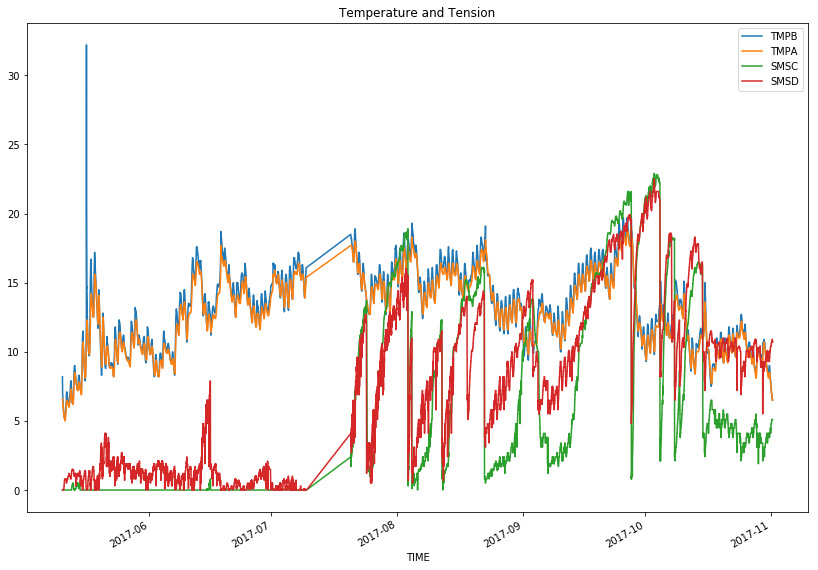

In [14]:
df4.plot(x="TIME", y=["TMPB", "TMPA", "SMSC", "SMSD"], figsize = (14,10), title="Temperature and Tension")

# INTERACTIVE VISUALISATIONS

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime


In [20]:
trace_TMPA = go.Scatter(x=list(df4.TIME),
                        y=list(df4.TMPA),
                        name='TMPA',
                        line=dict(color='#33CFA5'))

trace_TMPA_avg = go.Scatter(x=list(df4.TIME),
                            y=[df4.TMPA.mean()]*len(df4.TIME),
                            name='TMPA Average',
                            visible=False,
                            line=dict(color='#33CFA6', dash='dash'))

trace_TMPB = go.Scatter(x=list(df4.TIME),
                            y=list(df4.TMPB),
                            name='TMPB',
                            line=dict(color='#FF4500', dash='dash'))

trace_SMSC = go.Scatter(x=list(df4.TIME),
                       y=list(df4.SMSC),
                       name='SMSC',
                       line=dict(color='#00FF00'))

trace_SMSD = go.Scatter(x=list(df4.TIME),
                           y=list(df4.SMSD),
                           name='SMSD',
                           line=dict(color='#00BFFF', dash='dash'))


In [21]:
data = [trace_TMPA, trace_TMPA_avg, trace_TMPB, trace_SMSC, trace_SMSD]

In [7]:
updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = 'TMPA',
                 method = 'update',
                 args = [{'visible': [True, True, False, False, False]},
                         {'title': 'TMPA'}]),
             dict(label = 'TMPB',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False]},
                         {'title': 'TMPB'}]),
            dict(label = 'SMSC',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False]},
                         {'title': 'SMSC'}]),
             dict(label = 'SMSD',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True]},
                         {'title': 'SMSD'}]),
            dict(label = 'All',
                 method = 'update',
                 args = [{'visible': [True, True, True, True, True]},
                         {'title': 'TMPA, TMPB, SMSC & SMSD'}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False]},
                         {'title': 'Reseted view'}])
        ]),
    )
])

In [22]:
layout = dict(title='TEMPERATURE AND TENSION', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig)

The draw time for this plot will be slow for clients without much RAM.


/home/jupyterhub/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

/home/jupyterhub/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# IN THE WORKS

## Jupyter Notebooks

- Add Data cleaning examples
- Add an R template
- Add instruction for Web Visualisations
- Repeated Data Identification

## Jupyter Infrastructure

- Create different accounts
- Configure WebDav protocol to be able to access information from Nextcloud via URL
- Configure GitHub account
- Create detailed instruction for Sharing notebooks and visualisations
- Configure certificate

## NextCloud 

- Configure Certificate in Dev and Prod

## Website

- Configure Map in javascript
- Create visualisation page
- Finish up many details
- Deploy from cloud to DEV and PROD
- SSO???? - most likely not